In [1]:
!git clone https://github.com/Praneet9/Cryptocurrency_Prediction

Cloning into 'Cryptocurrency_Prediction'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 49 (delta 7), reused 44 (delta 5), pack-reused 0
Unpacking objects: 100% (49/49), done.


In [2]:
cd Cryptocurrency_Prediction/

/content/Cryptocurrency_Prediction


In [3]:
ls

Cryptocurrency.ipynb  dataset/  dataset2/  logs/  models/  README.md


In [4]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from collections import deque
import random
import time
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, BatchNormalization, LSTM
from keras.callbacks import TensorBoard, ModelCheckpoint
import tensorflow as tf
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
SEQ_LEN = 60
FUTURE_PERIOD_PREDICT = 10
RATIO_TO_PREDICT = 'BTC-USD'
EPOCHS = 100
BATCH_SIZE = 64
NAME = RATIO_TO_PREDICT + '-' + str(SEQ_LEN) + "-SEQ-" + str(FUTURE_PERIOD_PREDICT) + "-PRED-" + str(int(time.time()))

In [0]:
# main_df = pd.DataFrame()

# ratios = ['stratis', 'monero', 'waves', 'bitcoin', 'litecoin',
#           'numeraire', 'dash', 'omisego', 'bitcoin_cash', 'ethereum_classic',
#           'ripple', 'ethereum', 'bitconnect', 'nem', 'iota', 'neo',
#           'qtum']

In [0]:
# for ratio in ratios:
#     dataset = "dataset/" + ratio + '_price' + ".csv"
    
#     df = pd.read_csv(dataset)
    
#     df.rename(columns={'Close': ratio + '_Close', 'Volume': ratio + '_Volume'}, inplace=True)
    
#     df.set_index('Date', inplace=True)
#     df = df[[ratio + '_Close', ratio + '_Volume']]
    
#     if len(main_df) == 0:
#         main_df = df
#     else:
#         main_df = main_df.join(df)

In [0]:
main_df = pd.DataFrame() # begin empty

ratios = ["BTC-USD", "LTC-USD", "BCH-USD", "ETH-USD"] 

In [0]:
for ratio in ratios:
    dataset = "dataset2/" + ratio + ".csv"
    
    df = pd.read_csv(dataset, names=['time', 'low', 'high', 'open', 'Close', 'Volume'])
    
    df.rename(columns={'Close': ratio + '_Close', 'Volume': ratio + '_Volume'}, inplace=True)
    
    df.set_index('time', inplace=True)
    df = df[[ratio + '_Close', ratio + '_Volume']]
    
    if len(main_df) == 0:
        main_df = df
    else:
        main_df = main_df.join(df)

In [10]:
print(main_df.head())

            BTC-USD_Close  BTC-USD_Volume  LTC-USD_Close  LTC-USD_Volume  \
time                                                                       
1528968660    6489.549805        0.587100      96.580002        9.647200   
1528968720    6487.379883        7.706374      96.660004      314.387024   
1528968780    6479.410156        3.088252      96.570000       77.129799   
1528968840    6479.410156        1.404100      96.500000        7.216067   
1528968900    6479.979980        0.753000      96.389999      524.539978   

            BCH-USD_Close  BCH-USD_Volume  ETH-USD_Close  ETH-USD_Volume  
time                                                                      
1528968660     871.719971        5.675361            NaN             NaN  
1528968720     870.859985       26.856577      486.01001       26.019083  
1528968780     870.099976        1.124300      486.00000        8.449400  
1528968840     870.789978        1.749862      485.75000       26.994646  
1528968900     87

In [11]:
print(main_df.columns)

Index(['BTC-USD_Close', 'BTC-USD_Volume', 'LTC-USD_Close', 'LTC-USD_Volume',
       'BCH-USD_Close', 'BCH-USD_Volume', 'ETH-USD_Close', 'ETH-USD_Volume'],
      dtype='object')


In [0]:
def classify(current, future):
    if float(future) > float(current):
        return 1
    else:
        return 0

In [13]:
main_df['future'] = main_df[RATIO_TO_PREDICT + '_Close'].shift(- FUTURE_PERIOD_PREDICT)
print(main_df.head())

            BTC-USD_Close  BTC-USD_Volume  LTC-USD_Close  LTC-USD_Volume  \
time                                                                       
1528968660    6489.549805        0.587100      96.580002        9.647200   
1528968720    6487.379883        7.706374      96.660004      314.387024   
1528968780    6479.410156        3.088252      96.570000       77.129799   
1528968840    6479.410156        1.404100      96.500000        7.216067   
1528968900    6479.979980        0.753000      96.389999      524.539978   

            BCH-USD_Close  BCH-USD_Volume  ETH-USD_Close  ETH-USD_Volume  \
time                                                                       
1528968660     871.719971        5.675361            NaN             NaN   
1528968720     870.859985       26.856577      486.01001       26.019083   
1528968780     870.099976        1.124300      486.00000        8.449400   
1528968840     870.789978        1.749862      485.75000       26.994646   
1528968900 

In [14]:
print(main_df[[RATIO_TO_PREDICT + '_Close', 'future']].head())

            BTC-USD_Close       future
time                                  
1528968660    6489.549805  6478.660156
1528968720    6487.379883  6479.339844
1528968780    6479.410156  6479.350098
1528968840    6479.410156  6479.990234
1528968900    6479.979980  6481.890137


In [0]:
main_df['target'] = list(map(classify, main_df[RATIO_TO_PREDICT + '_Close'], main_df['future']))

In [16]:
print(main_df[[RATIO_TO_PREDICT + '_Close', 'future', 'target']].head(20))

            BTC-USD_Close       future  target
time                                          
1528968660    6489.549805  6478.660156       0
1528968720    6487.379883  6479.339844       0
1528968780    6479.410156  6479.350098       0
1528968840    6479.410156  6479.990234       1
1528968900    6479.979980  6481.890137       1
1528968960    6480.000000  6484.709961       1
1528969020    6477.220215  6484.709961       1
1528969080    6480.000000  6485.000000       1
1528969140    6479.990234  6485.000000       1
1528969200    6478.660156  6485.000000       1
1528969260    6478.660156  6489.990234       1
1528969320    6479.339844  6486.359863       1
1528969380    6479.350098  6487.259766       1
1528969440    6479.990234  6487.270020       1
1528969500    6481.890137  6490.000000       1
1528969560    6484.709961  6490.000000       1
1528969620    6484.709961  6492.680176       1
1528969680    6485.000000  6494.990234       1
1528969740    6485.000000  6494.450195       1
1528969800   

In [0]:
times = sorted(main_df.index.values)
last_5_pct = times[-int(0.05 * len(times))]

In [0]:
validation_main_df = main_df[(main_df.index >= last_5_pct)]
main_df = main_df[(main_df.index < last_5_pct)]

In [0]:
def preprocess_df(df):
    df = df.drop('future', 1)
    
    for col in df.columns:
        if col != 'target':
            df[col] = df[col].replace(',','').astype(float).pct_change()
            df.dropna(inplace = True)
            
            df[col] = preprocessing.scale(df[col].values)
            
    df.dropna(inplace = True)
    
    sequential_data = []
    prev_days = deque(maxlen = SEQ_LEN)
    
    for i in df.values:
        prev_days.append([n for n in i[:-1]])
        if len(prev_days) == SEQ_LEN:
            sequential_data.append([np.array(prev_days), i[-1]])
    
    random.shuffle(sequential_data)
    
    buys = []
    sells = []
    
    for seq, target in sequential_data:
        if target == 0:
            sells.append([seq, target])
        elif target == 1:
            buys.append([seq, target])
            
    random.shuffle(buys)
    random.shuffle(sells)
    
    lower = min(len(buys), len(sells))
    
    buys = buys[:lower]
    sells = sells[:lower]
    
    sequential_data = buys + sells
    
    random.shuffle(sequential_data)
    
    X = []
    y = []
    
    for seq, target in sequential_data:
        X.append(seq)
        y.append(target)
        
    return np.array(X), y

In [0]:
train_x, train_y = preprocess_df(main_df)
validation_x, validation_y = preprocess_df(main_df)

In [21]:
print("Train Data: " + str(len(train_x)), "Validation Data: " + str(len(validation_x)))
print("Don't Buys: " + str(train_y.count(0)), "Buys: " + str(validation_y.count(1)))
print("Validation Don't Buys: " + str(validation_y.count(0)), "Buys: " + str(validation_y.count(1)))

Train Data: 80444 Validation Data: 80444
Don't Buys: 40222 Buys: 40222
Validation Don't Buys: 40222 Buys: 40222


In [22]:
model = Sequential()

model.add(CuDNNLSTM(128, input_shape = (train_x.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(CuDNNLSTM(128, input_shape = (train_x.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(CuDNNLSTM(128, input_shape = (train_x.shape[1:])))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

opt = Adam(lr=0.001, decay=1e-6)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

tensorboard = TensorBoard(log_dir = 'logs/' + NAME)

filepath = 'RNN_Final'
checkpoint = ModelCheckpoint('models/{}.model'.format(filepath, monitor='val_acc',
                                                      verbose=1,
                                                      save_best_only = True,
                                                      mode = 'max'))

history =  model.fit(train_x, train_y,
                     batch_size = BATCH_SIZE,
                     epochs = EPOCHS,
                     validation_data = (validation_x, validation_y),
                     callbacks = [tensorboard, checkpoint])

Train on 80444 samples, validate on 80444 samples
Epoch 1/100
80444/80444 [==============================] - 106s 1ms/step - loss: 0.7082 - acc: 0.5325 - val_loss: 0.6929 - val_acc: 0.5200
Epoch 2/100
80444/80444 [==============================] - 93s 1ms/step - loss: 0.6835 - acc: 0.5575 - val_loss: 0.6778 - val_acc: 0.5712
Epoch 3/100
80444/80444 [==============================] - 94s 1ms/step - loss: 0.6749 - acc: 0.5766 - val_loss: 0.6726 - val_acc: 0.5813
Epoch 4/100
80444/80444 [==============================] - 91s 1ms/step - loss: 0.6621 - acc: 0.6003 - val_loss: 0.6341 - val_acc: 0.6338
Epoch 5/100
80444/80444 [==============================] - 89s 1ms/step - loss: 0.6317 - acc: 0.6408 - val_loss: 0.5920 - val_acc: 0.6809
Epoch 6/100
80444/80444 [==============================] - 89s 1ms/step - loss: 0.5792 - acc: 0.6921 - val_loss: 0.5217 - val_acc: 0.7366
Epoch 7/100
80444/80444 [==============================] - 92s 1ms/step - loss: 0.5252 - acc: 0.7351 - val_loss: 0.4686 -

In [23]:
model_json = model.to_json()
with open("models/model_json.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("models/model_weights.h5")
print("Saved model to disk")

import json
with open('models/history.json', 'w') as f:
    json.dump(history.history, f)

Saved model to disk


In [0]:
import matplotlib.pyplot as plt

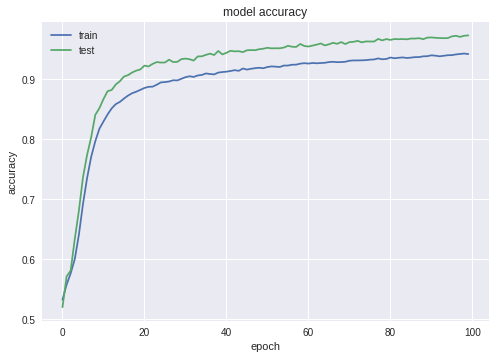

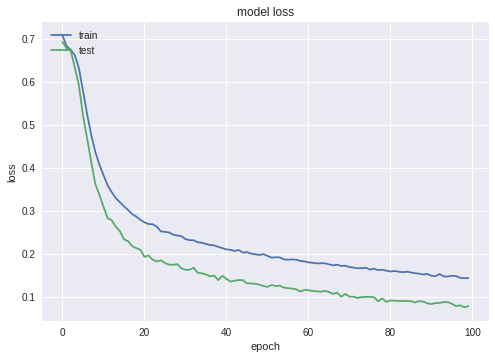

In [32]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()